# MORE EDA ON TRAIN plus WEATHER  
    
  
This notebook goes into more details uncovering the relationships between the weekly time lags of various weather features and the `WnvPresent` and `NumMosquitos`.  

Different weather features have varying importances as to which weekly time lags are the strongest determinant for the mosquito party peaking in Jul-Aug. For instance, a 3-week time lag of `Tavg` was found to be the most important whereas a 4-5 week time lag of `StnPressure` appears to foreshadow the mosquito party.  

Using the `trap_cluster` feature that we have created in `EDA_Train_Test_Sets`, wherein each trap_cluster is segregated based on their total occurrences of `WnvPresent` over the four years, we can clearly identify strong weekly time lag features to explain the surge in `NumMosquitos` and `WnvPresent` during Jul-Aug.  

By grouping `Tavg` and `rh` features into various weather groups, we found that a 3-week time lags of `superHot_Dry`, `superHot_Wet`, `Hot_Dry`, and `Hot_Wet` were indeed largely accountable for the heavy spread of Wnv-carriers in the past four years.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 78)

In [2]:
train_weather = './datasets/train_weather.csv'

df = pd.read_csv(train_weather)

df.set_index('Date', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10413 entries, 2007-05-29 to 2013-09-26
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address                         10413 non-null  object 
 1   Species                         10413 non-null  object 
 2   Block                           10413 non-null  int64  
 3   Street                          10413 non-null  object 
 4   Trap                            10413 non-null  object 
 5   AddressNumberAndStreet          10413 non-null  object 
 6   Latitude                        10413 non-null  float64
 7   Longitude                       10413 non-null  float64
 8   AddressAccuracy                 10413 non-null  int64  
 9   NumMosquitos                    10413 non-null  int64  
 10  WnvPresent                      10413 non-null  int64  
 11  month_x                         10413 non-null  int64  
 12  year_x                

In [3]:
df.index = pd.to_datetime(df.index)
df.columns

Index(['Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent', 'month_x', 'year_x', 'week_x',
       'YearWeek_x', 'Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS', 'NumMosquitos_cluster', 'trap_cluster',
       'Station', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb',
       'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed',
       'month_y', 'year_y', 'week_y', 'YearWeek_y', 'rh', 'daily_Tavg_lag_1',
       'daily_Tavg_lag_2', 'daily_Tavg_lag_3', 'daily_Tavg_lag_4',
       'daily_Tavg_lag_5', 'daily_rh_lag_1', 'daily_rh_lag_2',
       'daily_rh_lag_3', 'daily_rh_lag_4', 'daily_rh_lag_5',
       'weekly_Tavg_lag_1', 'weekly_

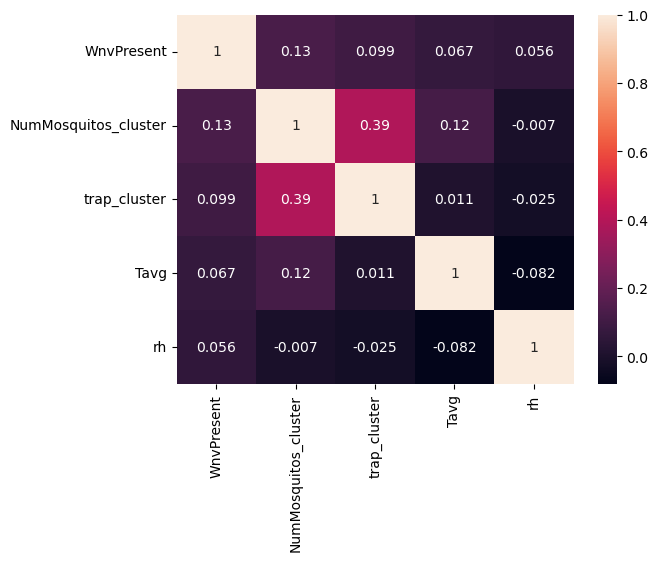

In [4]:
sns.heatmap(df[['WnvPresent', 'NumMosquitos_cluster', 'trap_cluster', 'Tavg', 'rh']].corr(), annot=True);


# NumMosquitos_cluster quite high positive corr with trap_cluster -- this means higher the NumMosquitos, higher the incidences of WnvPresent
# NumMosquitos doesnt seem to be correlated with current period Tavg and rh at all

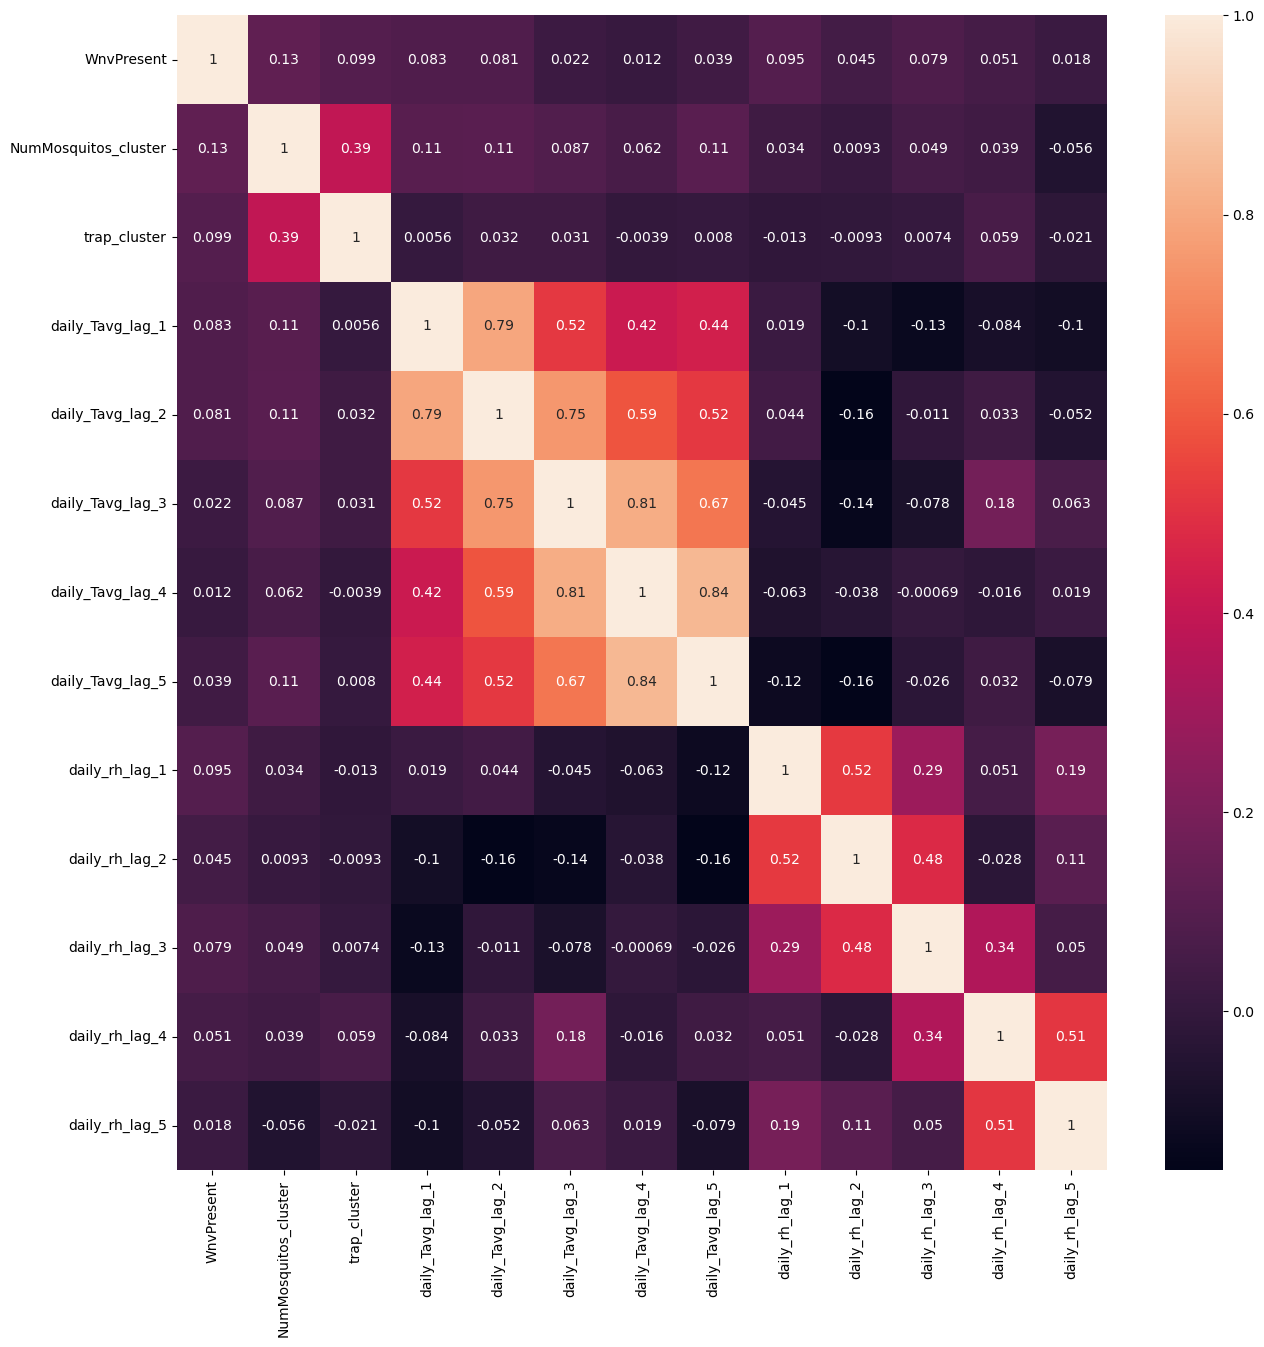

In [5]:
plt.figure(figsize=(15,15))
sns.heatmap(df[['WnvPresent', 'NumMosquitos_cluster', 'trap_cluster', 'daily_Tavg_lag_1', 'daily_Tavg_lag_2', 'daily_Tavg_lag_3',
       'daily_Tavg_lag_4', 'daily_Tavg_lag_5', 'daily_rh_lag_1', 'daily_rh_lag_2', 'daily_rh_lag_3', 'daily_rh_lag_4', 'daily_rh_lag_5']].corr(), annot=True);


# NumMosquitos_cluster and trap_cluster are not correlated with daily temp and relative humidity lags of up to 5

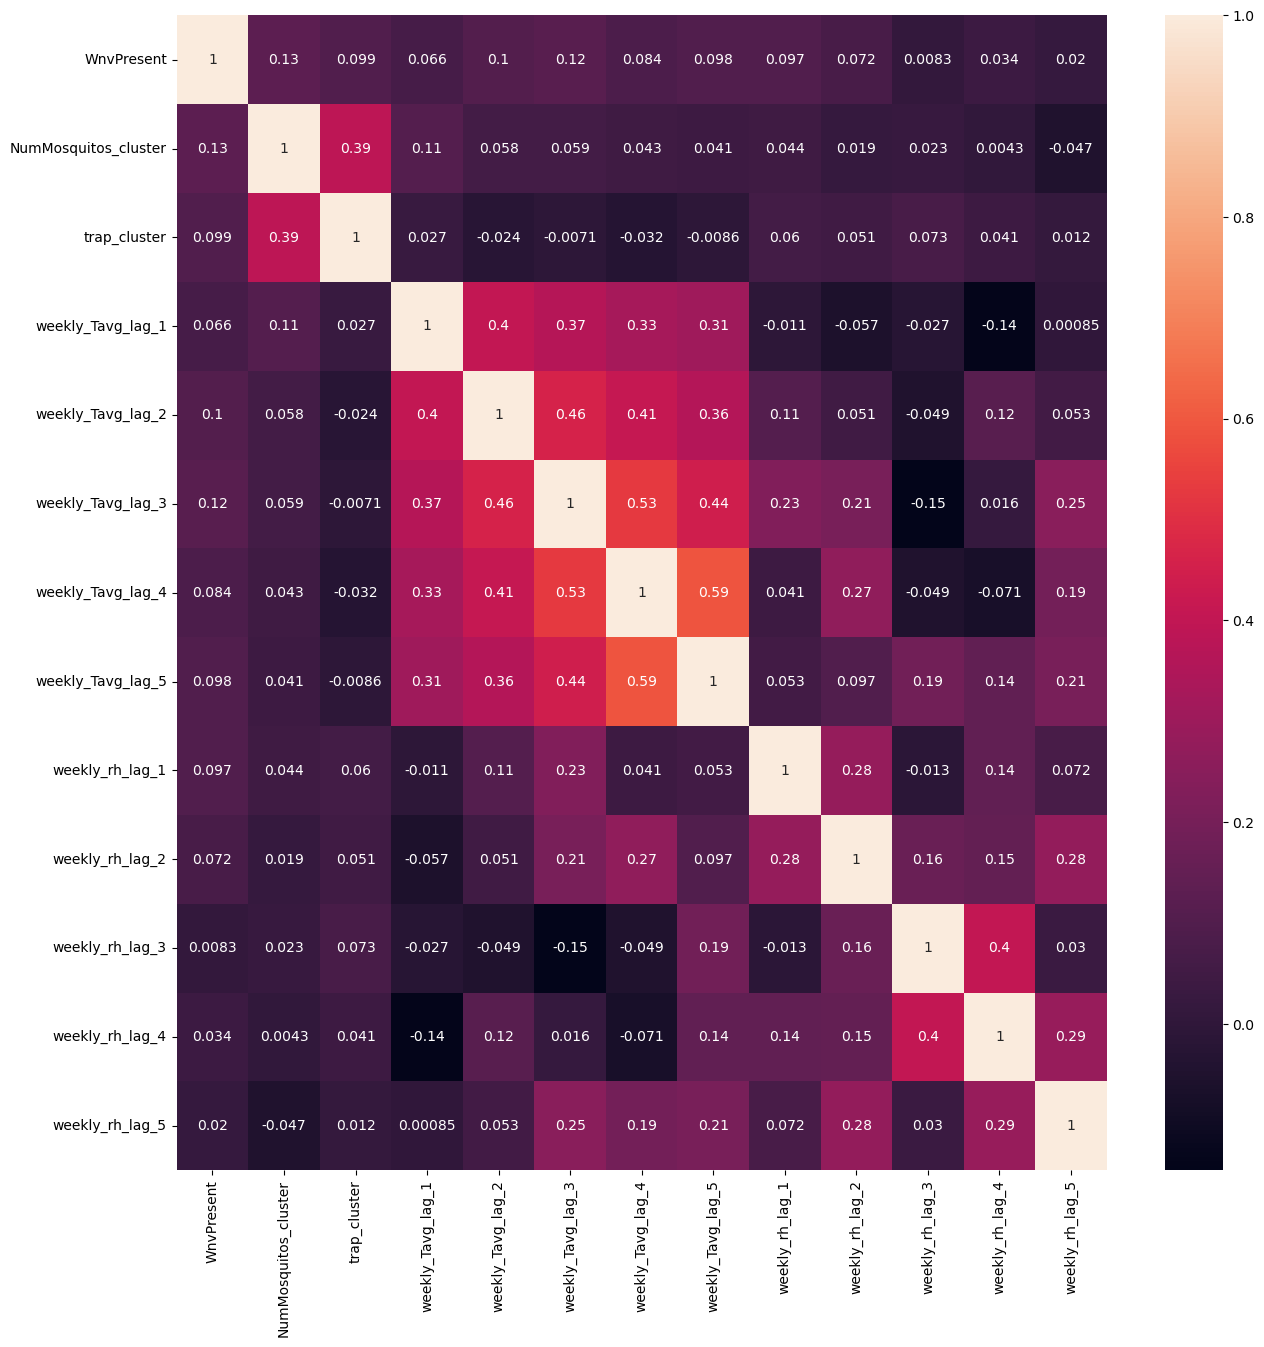

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(df[['WnvPresent', 'NumMosquitos_cluster', 'trap_cluster','weekly_Tavg_lag_1', 'weekly_Tavg_lag_2', 'weekly_Tavg_lag_3',
       'weekly_Tavg_lag_4', 'weekly_Tavg_lag_5', 'weekly_rh_lag_1',
       'weekly_rh_lag_2', 'weekly_rh_lag_3', 'weekly_rh_lag_4',
       'weekly_rh_lag_5']].corr(), annot=True);


# At best, NumMosquitos_cluster is only +0.11 corr with weekly_Tavg_lag_1 (rest are either useless features or the spray data has obscured the underlying relationship)
# Using NumMosquitos may not provide accurate info
# Crucially, trap_cluster and WnvPresent are not much correlated with all the temp and rh lag features up to 5 too
# leading indicators are not to be found within temp and rh in isolation

In [7]:
# Among the highest clusters of NumMosquitos and WnvPresent, what were the weather conditions like 1-4 weeks ago?
# For WnvPresent to be present in large numbers today, alot of eggs must have been hatched 1-4 weeks ago (this is the real predictive feature)

In [8]:
trap_cluster_3 = df[df['trap_cluster']==3].copy()

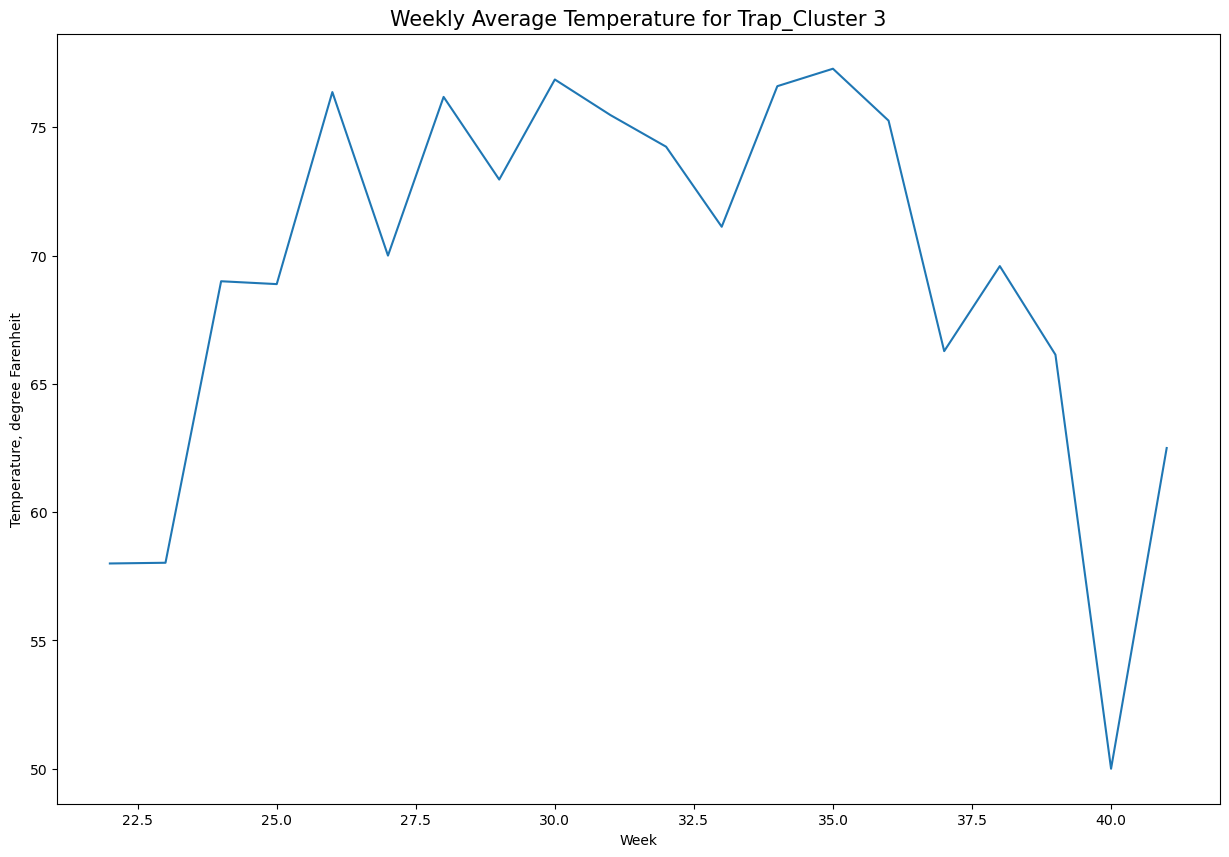

In [9]:
plt.figure(figsize=(15,10))
trap_cluster_3.groupby('week_x')['Tavg'].mean().plot()

# At Week 30 (mid-August): Tavg=75
# At Week 27 (late-July): Tavg=72

plt.title('Weekly Average Temperature for Trap_Cluster 3', fontsize=15)
plt.ylabel('Temperature, degree Farenheit')
plt.xlabel('Week');

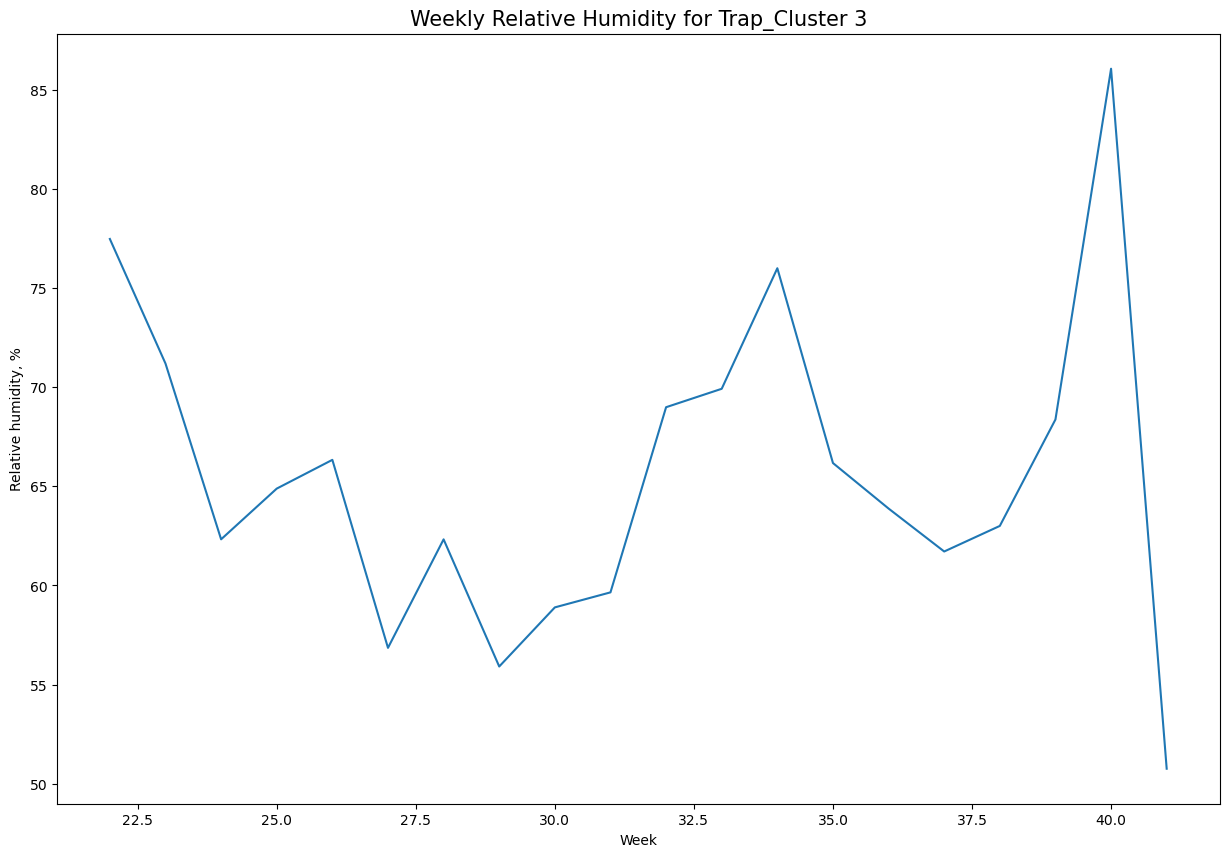

In [10]:
plt.figure(figsize=(15,10))
trap_cluster_3.groupby('week_x')['rh'].mean().plot()

# At Week 30 (mid-August): rh=58
# At Week 27 (late-July): rh=60

# Here, we can see that among the traps with the highest clusters of WnvPresent incidences, rh bottomed 3 weeks ago before.
# Combined with Tavg chart above, the temp also ranged in the optimal peak of 70-75F 3 weeks before and after
# Thus, hot and dry conditions are indeed the strongest leading indicator of a mosquito party 3 weeks later

plt.title('Weekly Relative Humidity for Trap_Cluster 3', fontsize=15)
plt.ylabel('Relative humidity, %')
plt.xlabel('Week');

In [11]:
trap_cluster_2 = df[df['trap_cluster']==2].copy()

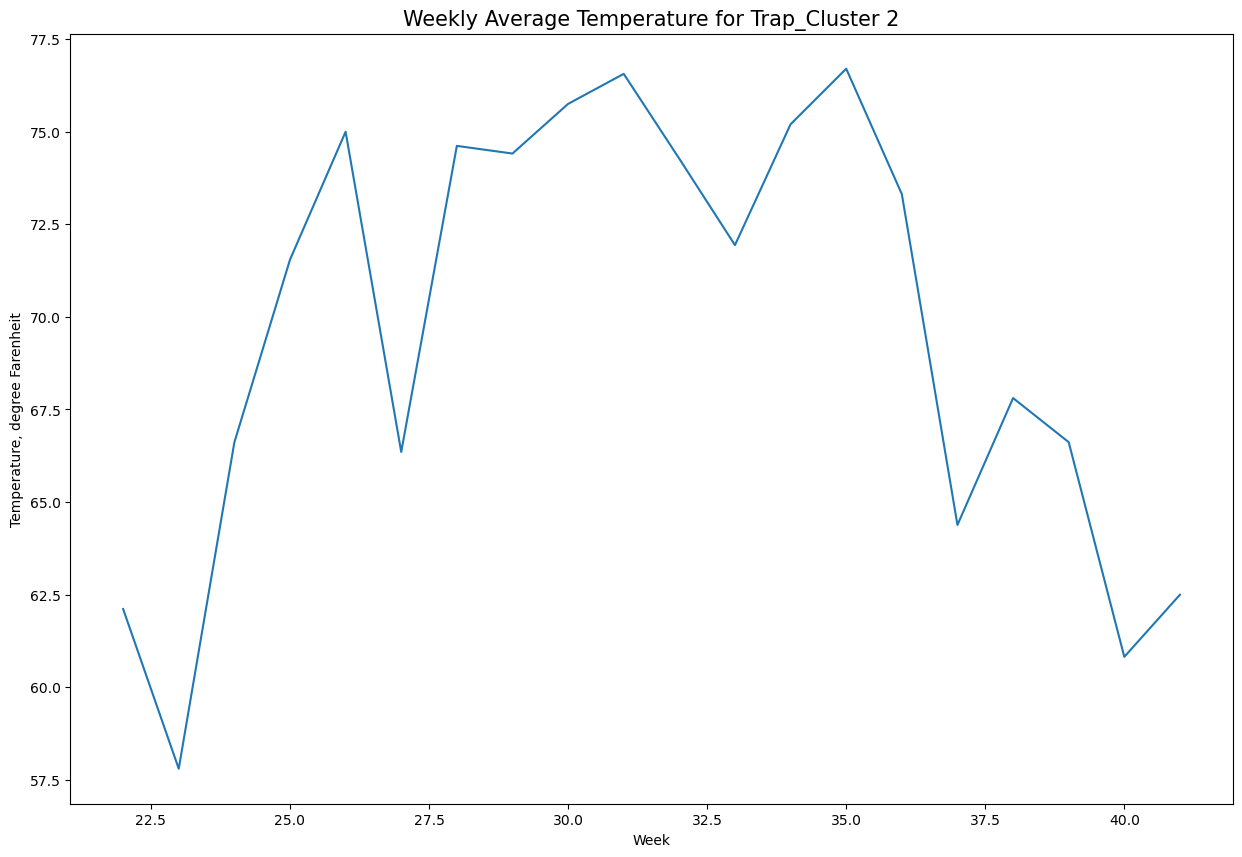

In [12]:
plt.figure(figsize=(15,10))
trap_cluster_2.groupby('week_x')['Tavg'].mean().plot()

# At Week 30 (mid-August): Tavg=75
# At Week 27 (late-July): Tavg=67

plt.title('Weekly Average Temperature for Trap_Cluster 2', fontsize=15)
plt.ylabel('Temperature, degree Farenheit')
plt.xlabel('Week');

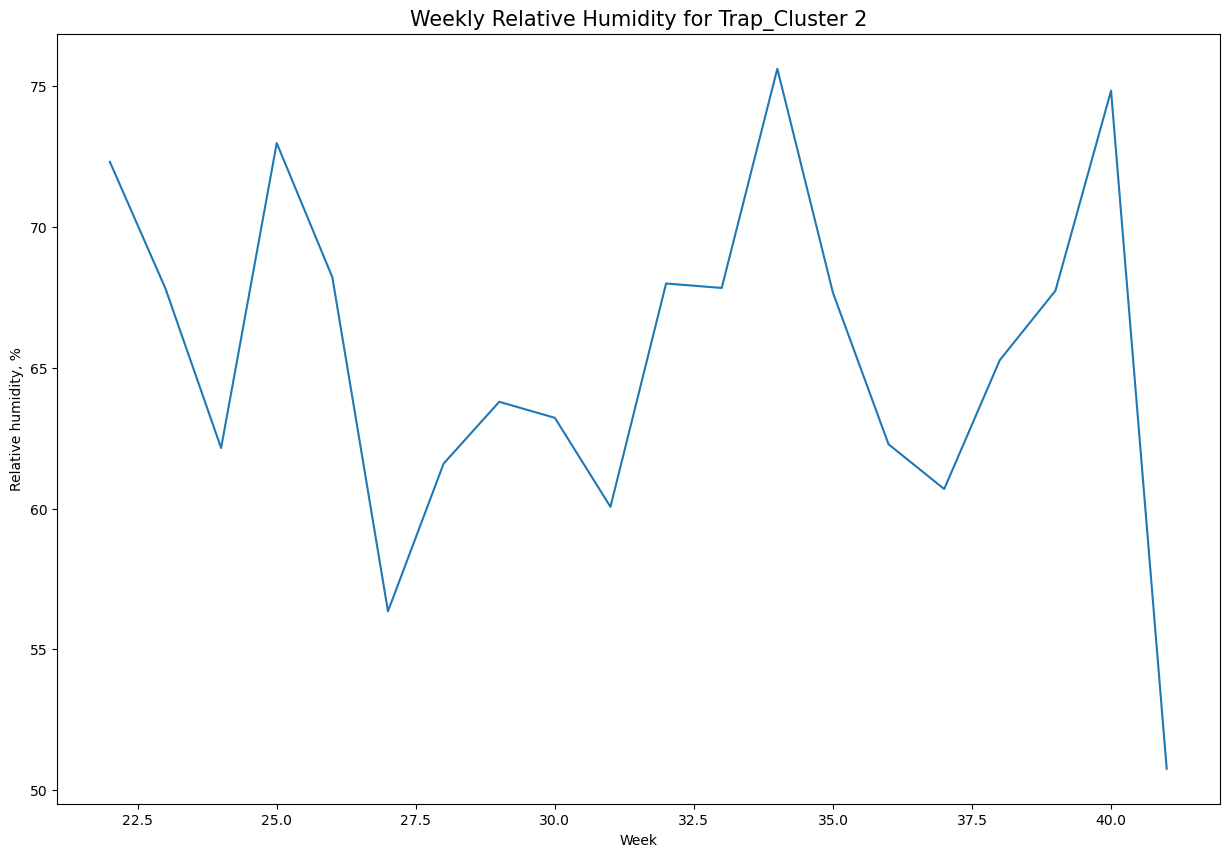

In [13]:
plt.figure(figsize=(15,10))
trap_cluster_2.groupby('week_x')['rh'].mean().plot()

# At Week 30 (mid-August): rh=62
# At Week 27 (late-July): rh=58

# For trap_cluster 2 where there are lower incidences of WnvPresent, we can see that 3 weeks before August, temp was slightly lower 
# than in cluster 3 and the rh was above 60% (vs around 53% in cluster 3!)

plt.title('Weekly Relative Humidity for Trap_Cluster 2', fontsize=15)
plt.ylabel('Relative humidity, %')
plt.xlabel('Week');

In [14]:
trap_cluster_2.groupby('week_x')['rh'].mean()

week_x
22    72.318079
23    67.814402
24    62.149608
25    72.985216
26    68.215444
27    56.348126
28    61.594484
29    63.792097
30    63.222984
31    60.059507
32    67.994999
33    67.836724
34    75.625899
35    67.665866
36    62.281534
37    60.693381
38    65.273549
39    67.739100
40    74.844925
41    50.755285
Name: rh, dtype: float64

In [15]:
trap_cluster_1 = df[df['trap_cluster']==1].copy()

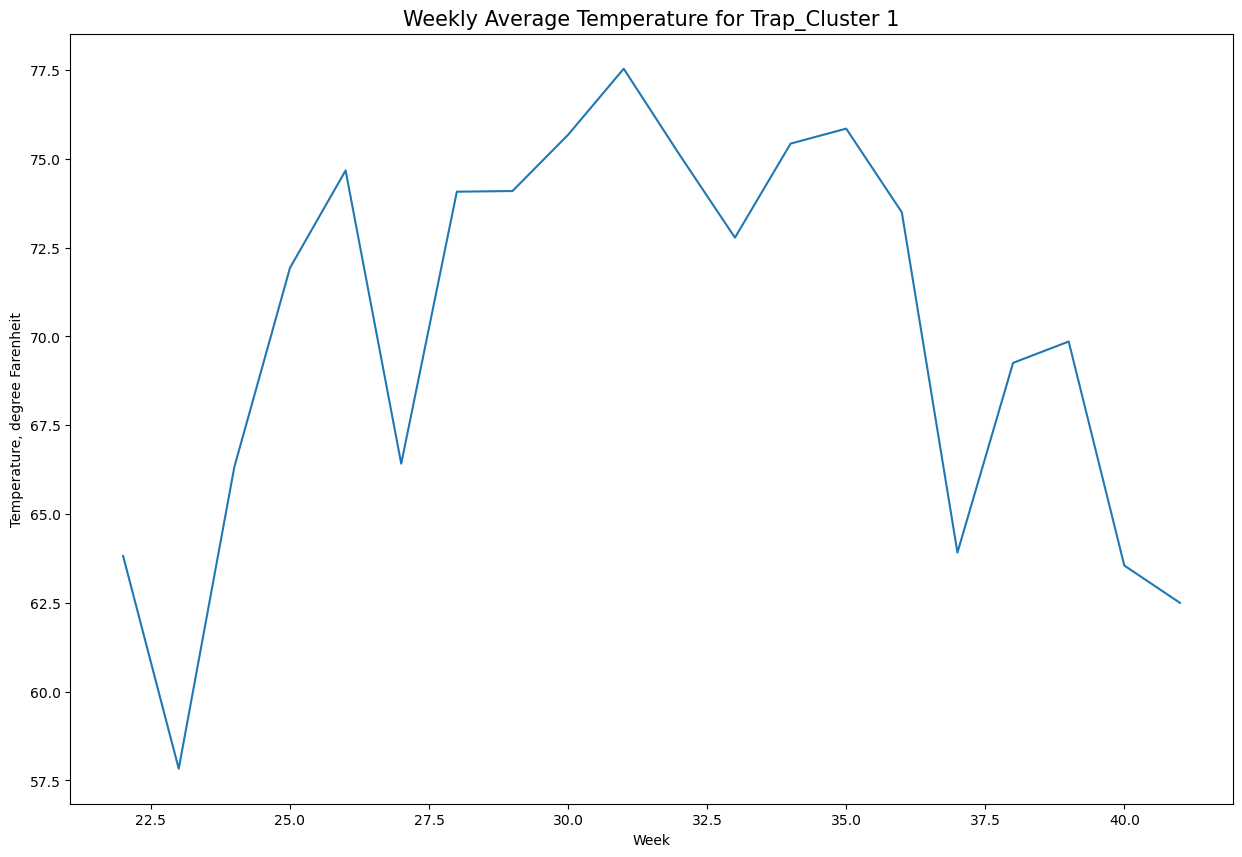

In [16]:
plt.figure(figsize=(15,10))
trap_cluster_1.groupby('week_x')['Tavg'].mean().plot()

# At Week 30 (mid-August): Tavg=76
# At Week 27 (late-July): Tavg=66

plt.title('Weekly Average Temperature for Trap_Cluster 1', fontsize=15)
plt.ylabel('Temperature, degree Farenheit')
plt.xlabel('Week');

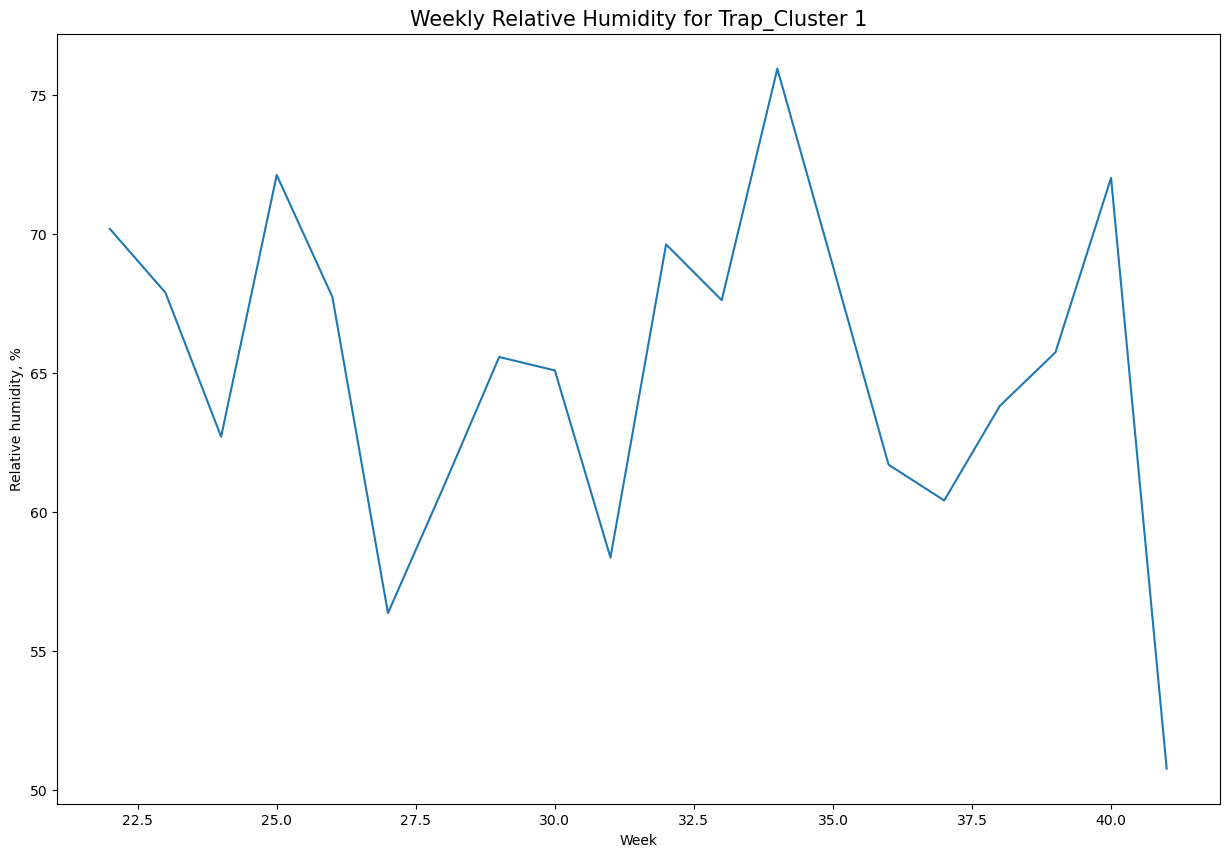

In [17]:
plt.figure(figsize=(15,10))
trap_cluster_1.groupby('week_x')['rh'].mean().plot()

# At Week 30 (mid-August): rh=64
# At Week 27 (late-July): rh=56

plt.title('Weekly Relative Humidity for Trap_Cluster 1', fontsize=15)
plt.ylabel('Relative humidity, %')
plt.xlabel('Week');

In [18]:
# Trap_cluster_3:  Wk30: Tavg=75 + rh=58 // Wk 27: Tavg=75 + rh=60
# Trap_cluster_2:  Wk30: Tavg=75 + rh=62 // Wk 27: Tavg=67 + rh=58
# Trap_cluster_1:  Wk30: Tavg=76 + rh=64 // Wk 27: Tavg=66 + rh=56

In [19]:
trap_clusters = [trap_cluster_1, trap_cluster_2, trap_cluster_3]

for i, trap_cluster in enumerate(trap_clusters):
    print(f'Trap Cluster {i+1}:')
    wk30_Tavg = int(trap_cluster.groupby('week_x')['Tavg'].mean().loc[30,])
    wk27_Tavg = int(trap_cluster.groupby('week_x')['Tavg'].mean().loc[27,])
    wk24_Tavg = int(trap_cluster.groupby('week_x')['Tavg'].mean().loc[24,])
    wk30_rh = int(trap_cluster.groupby('week_x')['rh'].mean().loc[30,])
    wk27_rh = int(trap_cluster.groupby('week_x')['rh'].mean().loc[27,])
    wk24_rh = int(trap_cluster.groupby('week_x')['rh'].mean().loc[24,])
    print(f'Week 30: Tavg = {wk30_Tavg} / RH = {wk30_rh}')
    print(f'Week 27: Tavg = {wk27_Tavg} / RH = {wk27_rh}')
    print(f'Week 24: Tavg = {wk24_Tavg} / RH = {wk24_rh}\n\n')

Trap Cluster 1:
Week 30: Tavg = 75 / RH = 65
Week 27: Tavg = 66 / RH = 56
Week 24: Tavg = 66 / RH = 62


Trap Cluster 2:
Week 30: Tavg = 75 / RH = 63
Week 27: Tavg = 66 / RH = 56
Week 24: Tavg = 66 / RH = 62


Trap Cluster 3:
Week 30: Tavg = 76 / RH = 58
Week 27: Tavg = 70 / RH = 56
Week 24: Tavg = 69 / RH = 62




In [20]:
# SuperHot+Dry 3 weeks ago is a good leading indicator (Tavg>=70 & rh<60)
# Hot+Dry 3 weeks ago is a moderate indicator (65<Tavg<70 & rh<60)
# Hot+Wet 3 weeks ago is a weak indicator (65<Tavg<70  & rh>=60)
# Cool+Dry 3 weeks ago is a negative indicator (Tavg<=65 & rh<60)
# Cool+Wet 3 weeks ago is a strong negative indicator (Tavg<=65 & rh>=60)

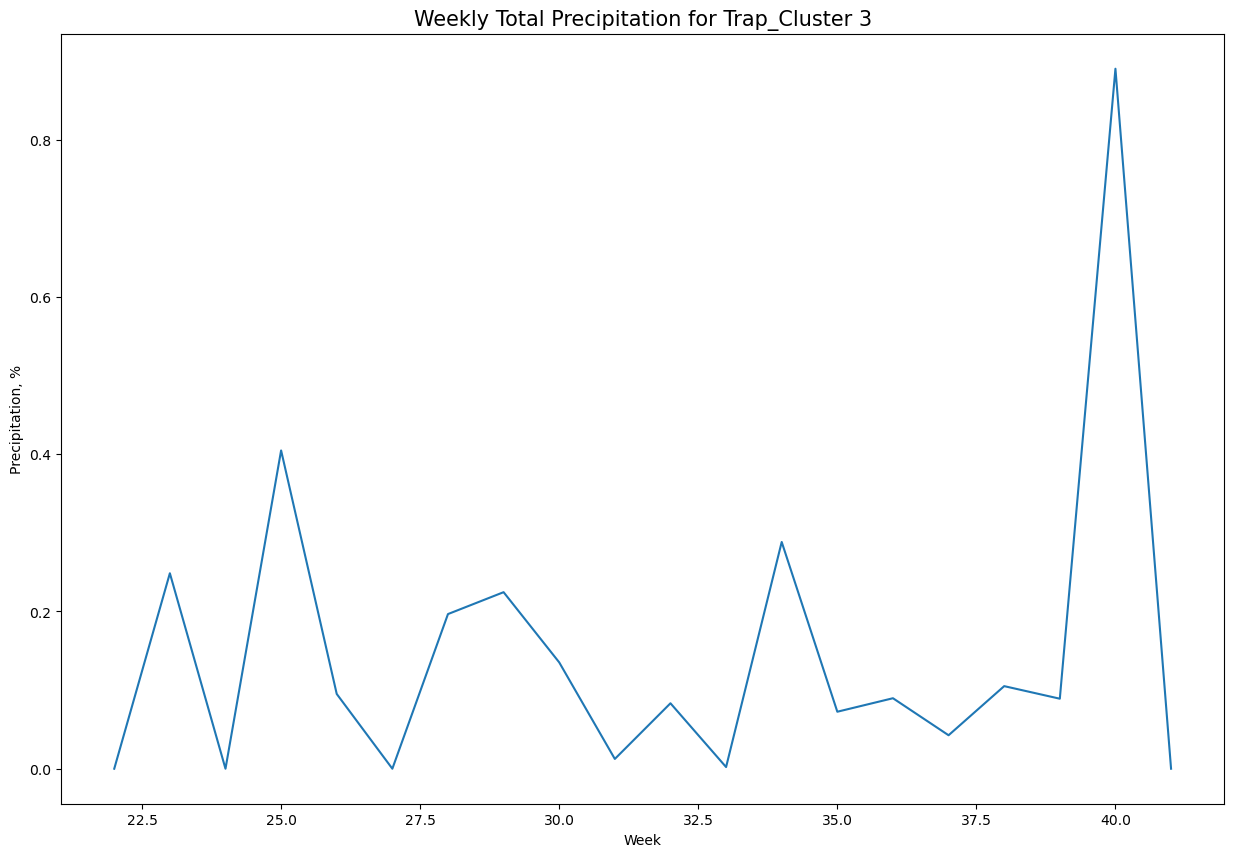

In [21]:
plt.figure(figsize=(15,10))
trap_cluster_3.groupby('week_x')['PrecipTotal'].mean().plot()

# The twin peaks during Week 29 and 34 looks suspect. With more precipitation, eggs hatch faster?

plt.title('Weekly Total Precipitation for Trap_Cluster 3', fontsize=15)
plt.ylabel('Precipitation, %')
plt.xlabel('Week');

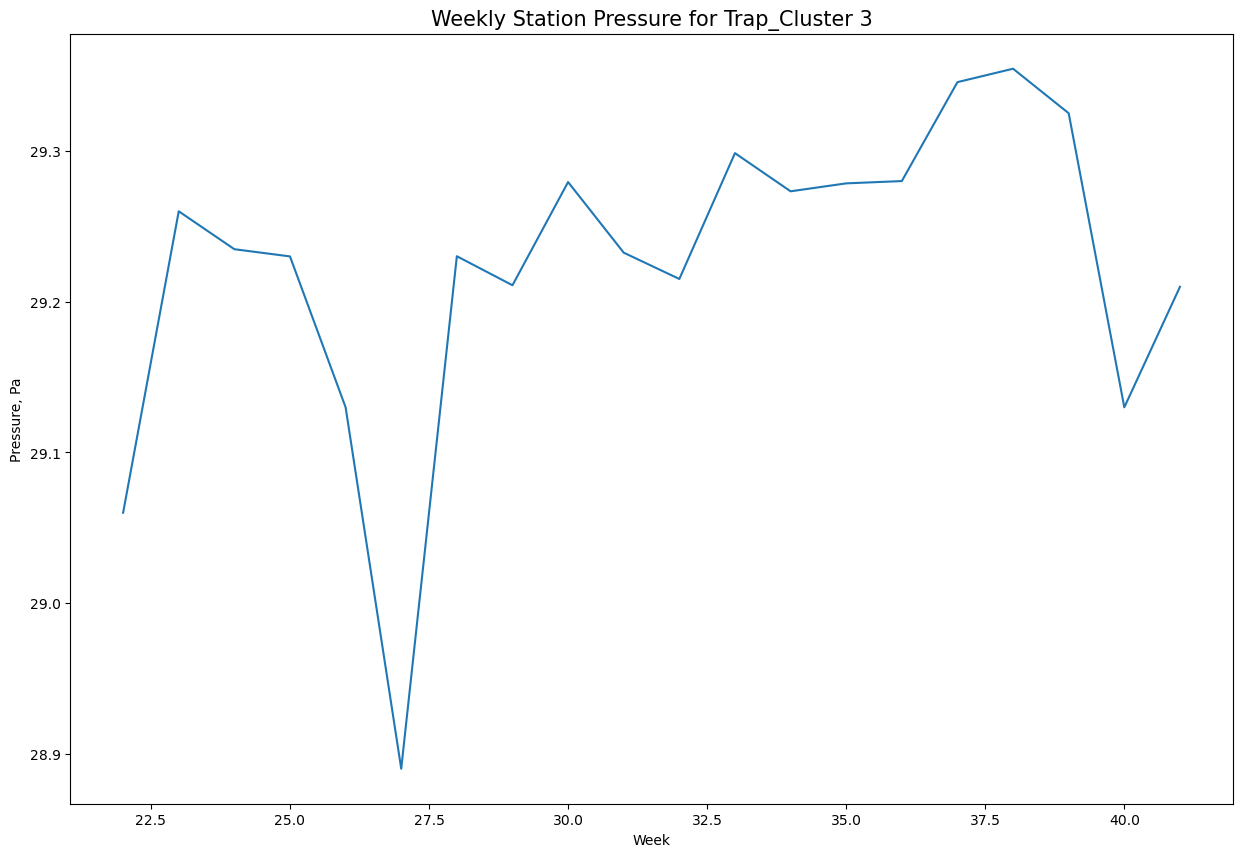

In [22]:
plt.figure(figsize=(15,10))
trap_cluster_3.groupby('week_x')['StnPressure'].mean().plot()

# StnPressure 3 weeks ago very important too! When pressure falls sharply mid-Jul to Aug, incidences of WnvPresent arose as seen in Trap Cluster 3

plt.title('Weekly Station Pressure for Trap_Cluster 3', fontsize=15)
plt.ylabel('Pressure, Pa')
plt.xlabel('Week');

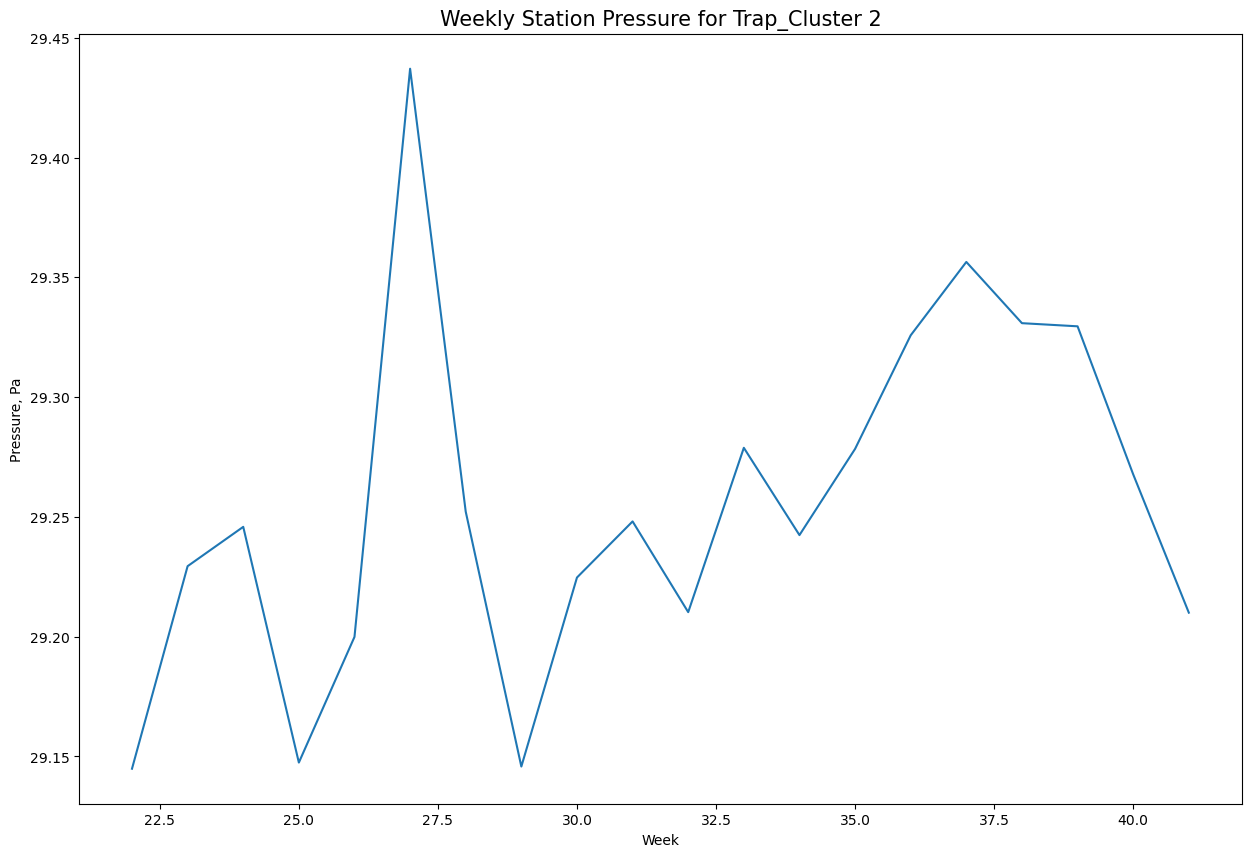

In [23]:
plt.figure(figsize=(15,10))
trap_cluster_2.groupby('week_x')['StnPressure'].mean().plot()

plt.title('Weekly Station Pressure for Trap_Cluster 2', fontsize=15)
plt.ylabel('Pressure, Pa')
plt.xlabel('Week');

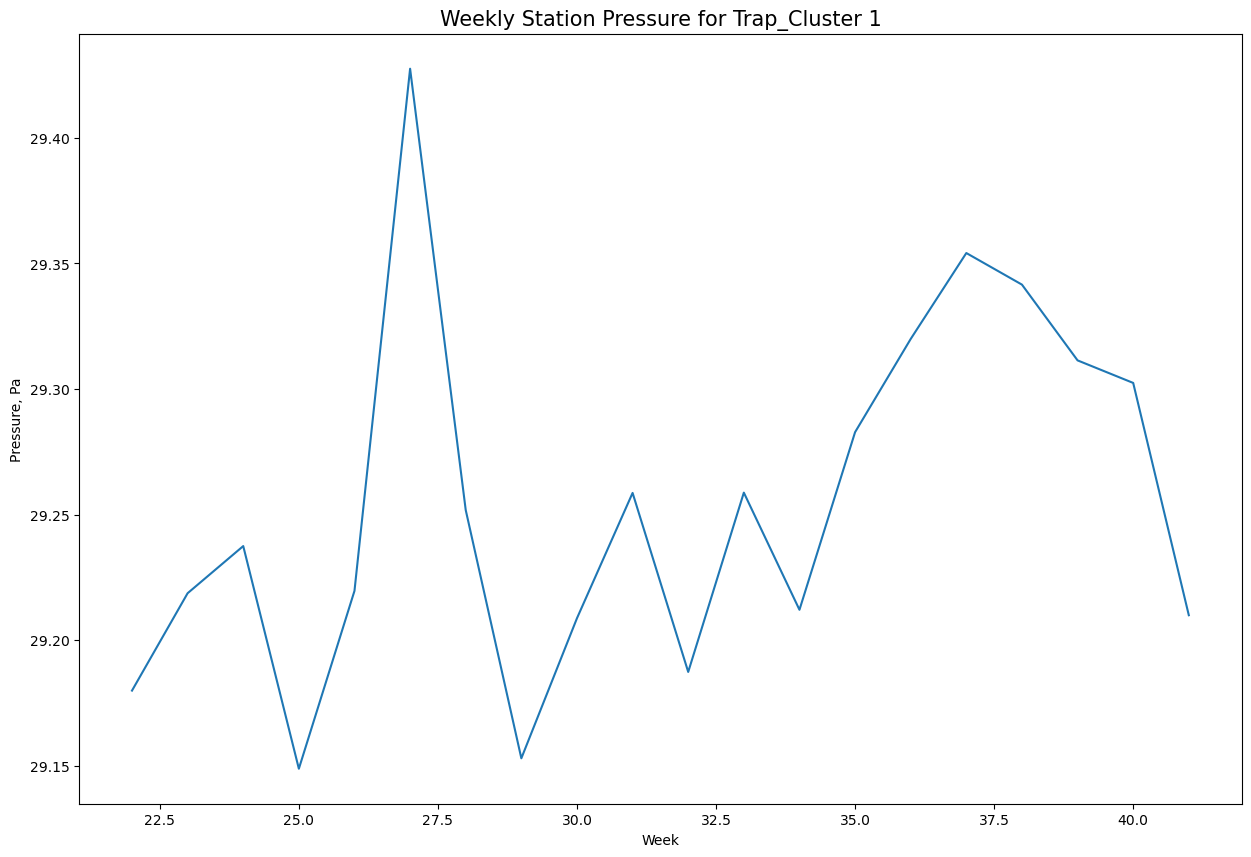

In [24]:
plt.figure(figsize=(15,10))
trap_cluster_1.groupby('week_x')['StnPressure'].mean().plot()

plt.title('Weekly Station Pressure for Trap_Cluster 1', fontsize=15)
plt.ylabel('Pressure, Pa')
plt.xlabel('Week');

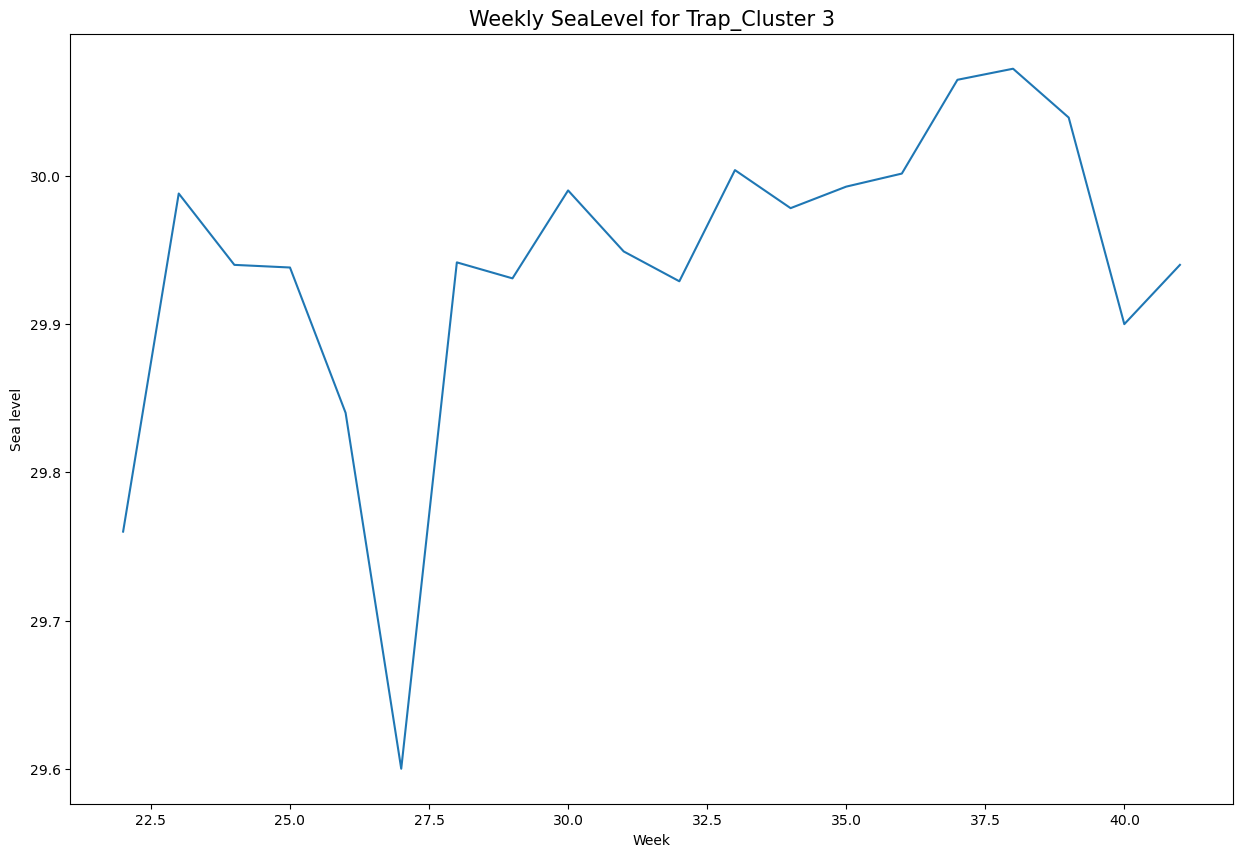

In [25]:
plt.figure(figsize=(15,10))
trap_cluster_3.groupby('week_x')['SeaLevel'].mean().plot()

# SeaLevel is also important!

plt.title('Weekly SeaLevel for Trap_Cluster 3', fontsize=15)
plt.ylabel('Sea level')
plt.xlabel('Week');

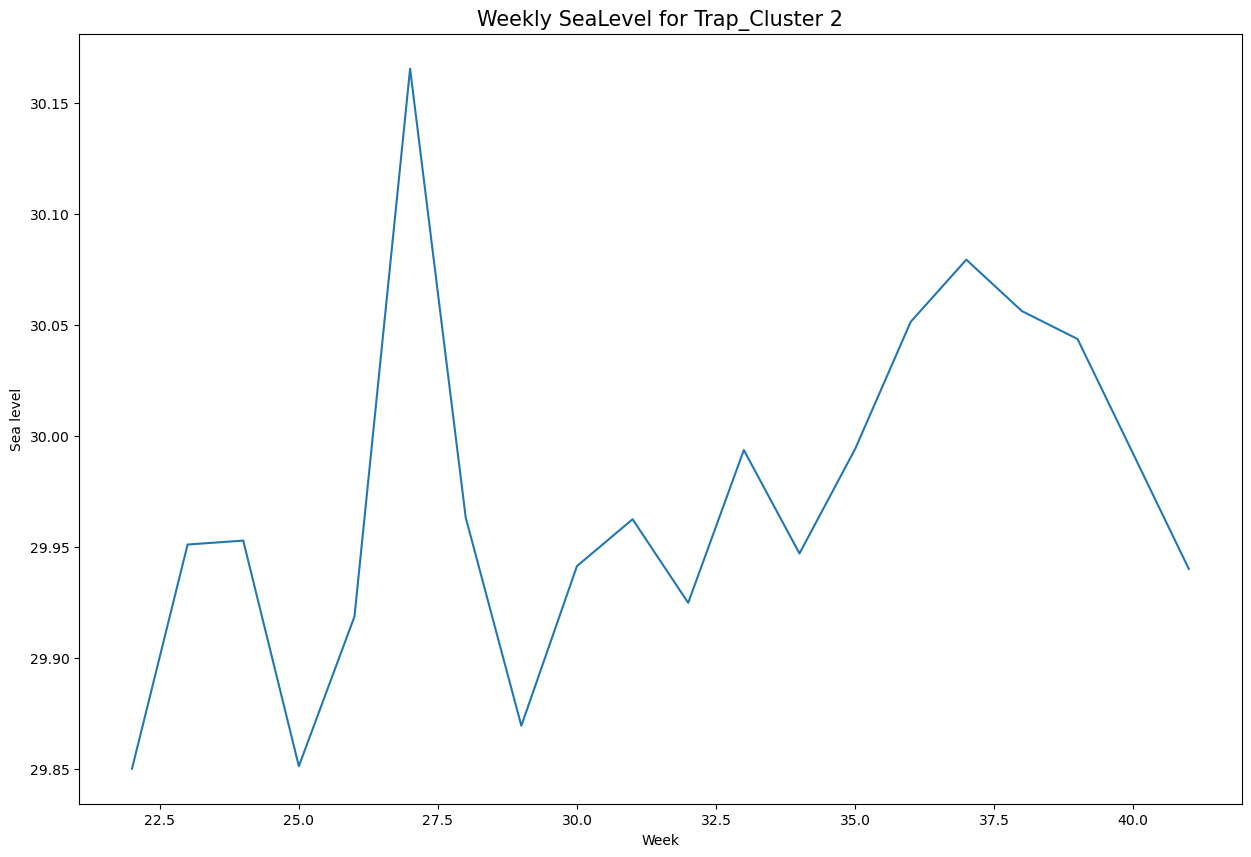

In [26]:
plt.figure(figsize=(15,10))
trap_cluster_2.groupby('week_x')['SeaLevel'].mean().plot()

plt.title('Weekly SeaLevel for Trap_Cluster 2', fontsize=15)
plt.ylabel('Sea level')
plt.xlabel('Week');

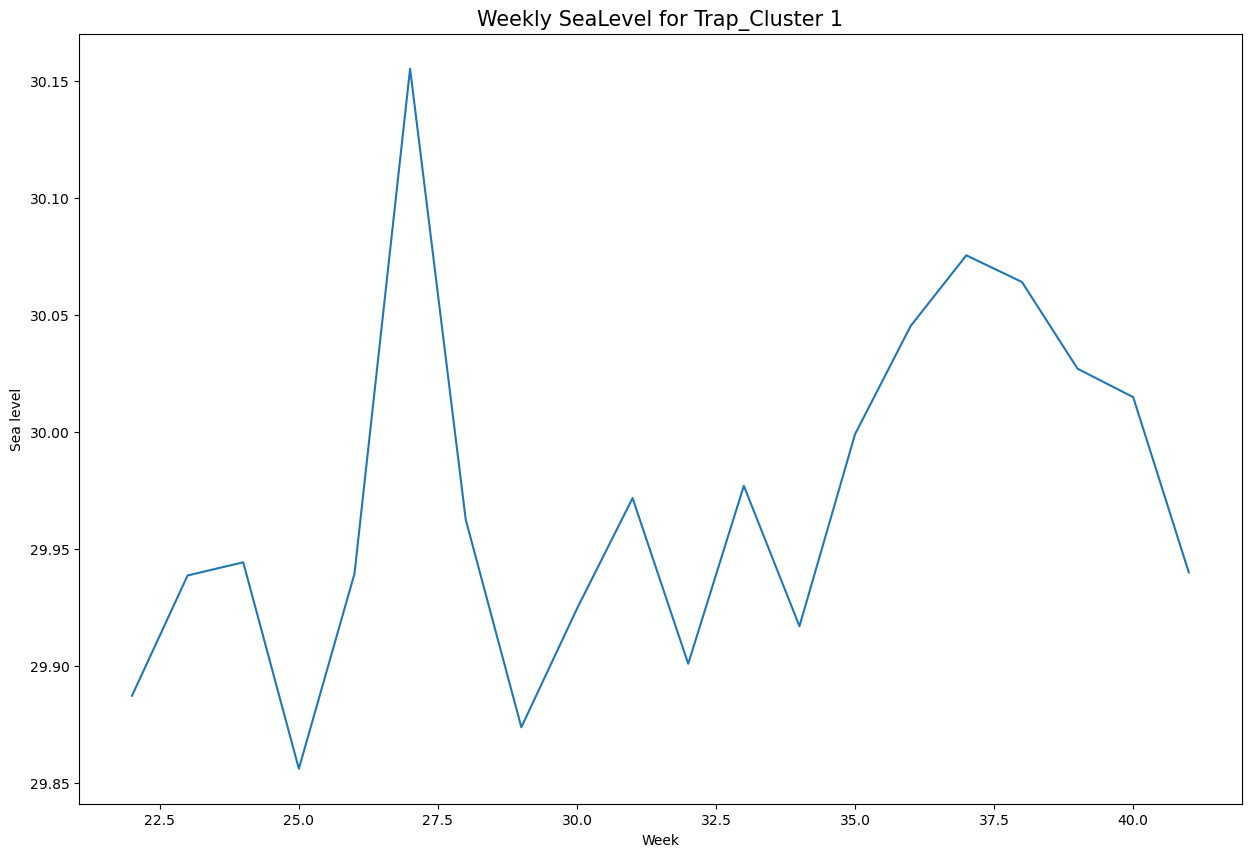

In [27]:
plt.figure(figsize=(15,10))
trap_cluster_1.groupby('week_x')['SeaLevel'].mean().plot()

plt.title('Weekly SeaLevel for Trap_Cluster 1', fontsize=15)
plt.ylabel('Sea level')
plt.xlabel('Week');

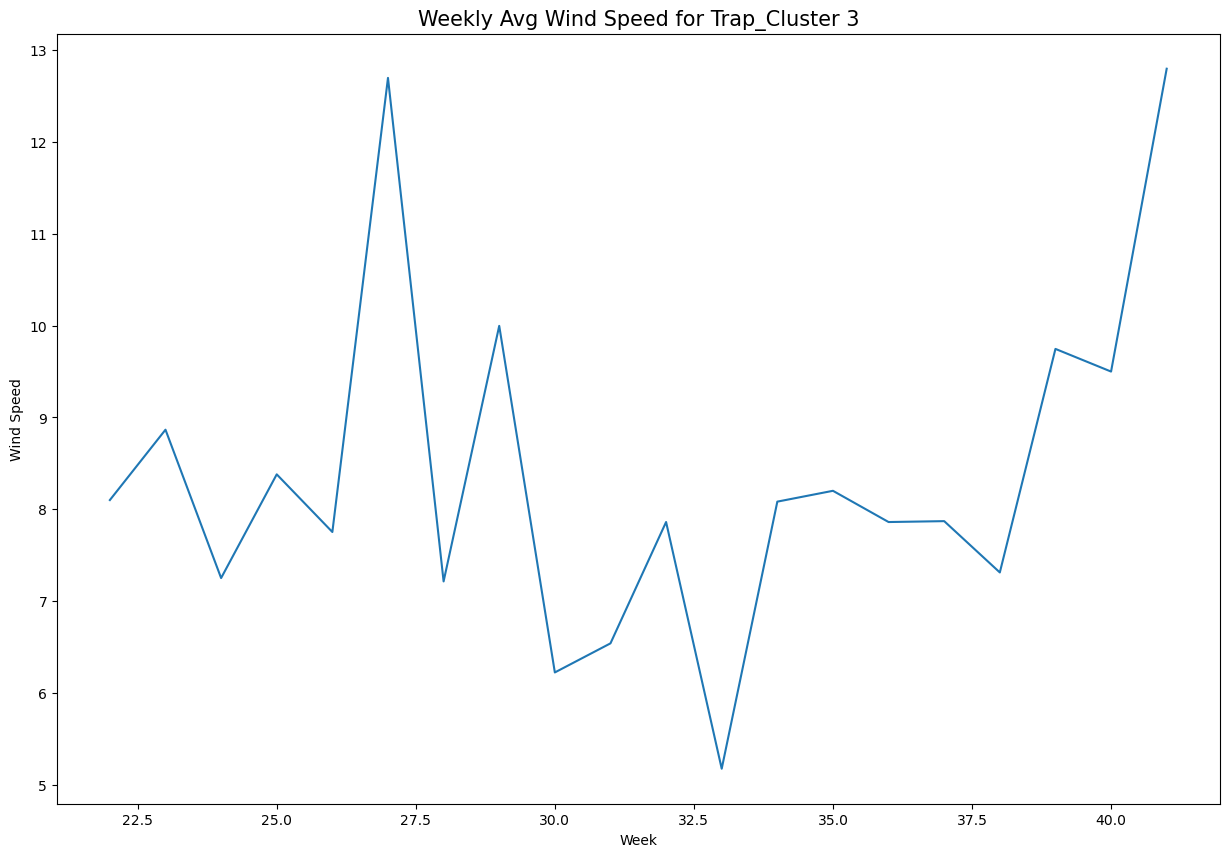

In [28]:
plt.figure(figsize=(15,10))
trap_cluster_3.groupby('week_x')['AvgSpeed'].mean().plot()

# AvgSpeed looks pretty similar between the three Trap Clusters so probably not meaningful

plt.title('Weekly Avg Wind Speed for Trap_Cluster 3', fontsize=15)
plt.ylabel('Wind Speed')
plt.xlabel('Week');

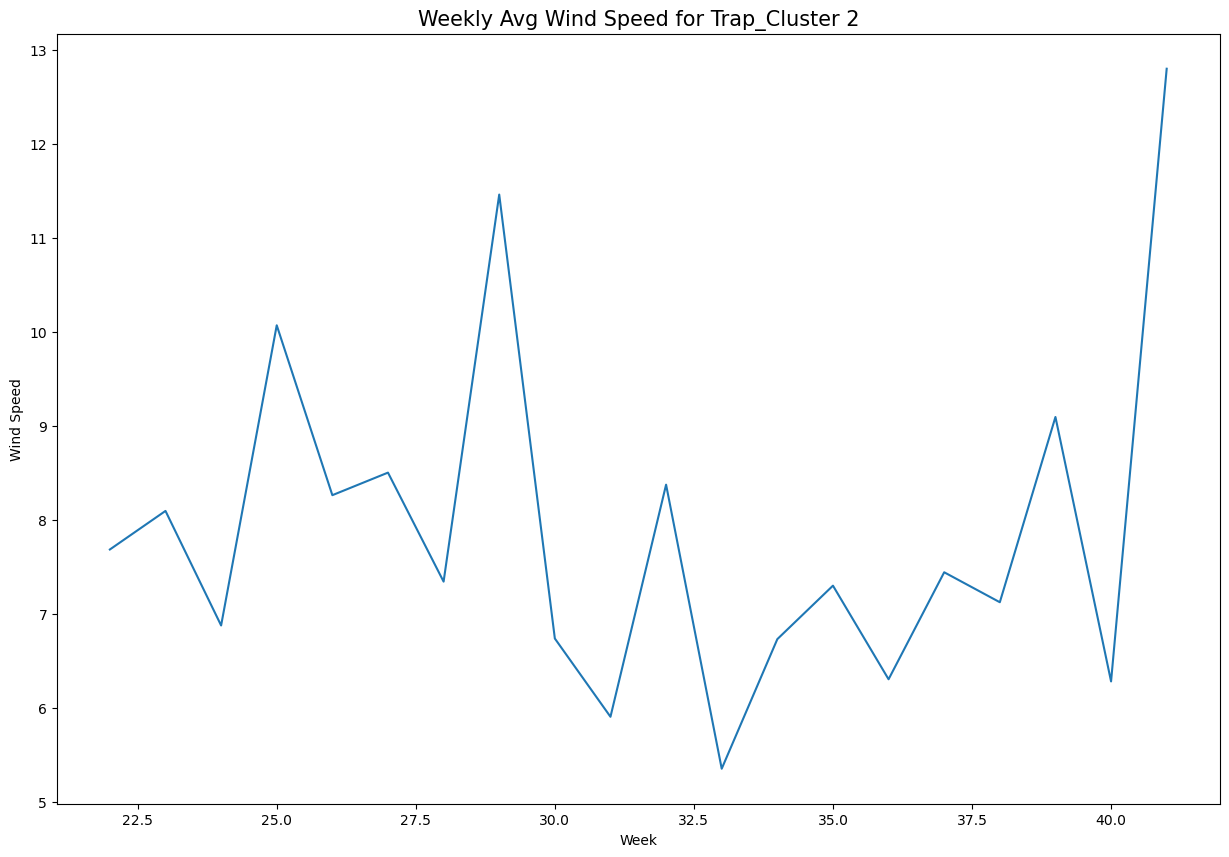

In [29]:
plt.figure(figsize=(15,10))
trap_cluster_2.groupby('week_x')['AvgSpeed'].mean().plot()

plt.title('Weekly Avg Wind Speed for Trap_Cluster 2', fontsize=15)
plt.ylabel('Wind Speed')
plt.xlabel('Week');

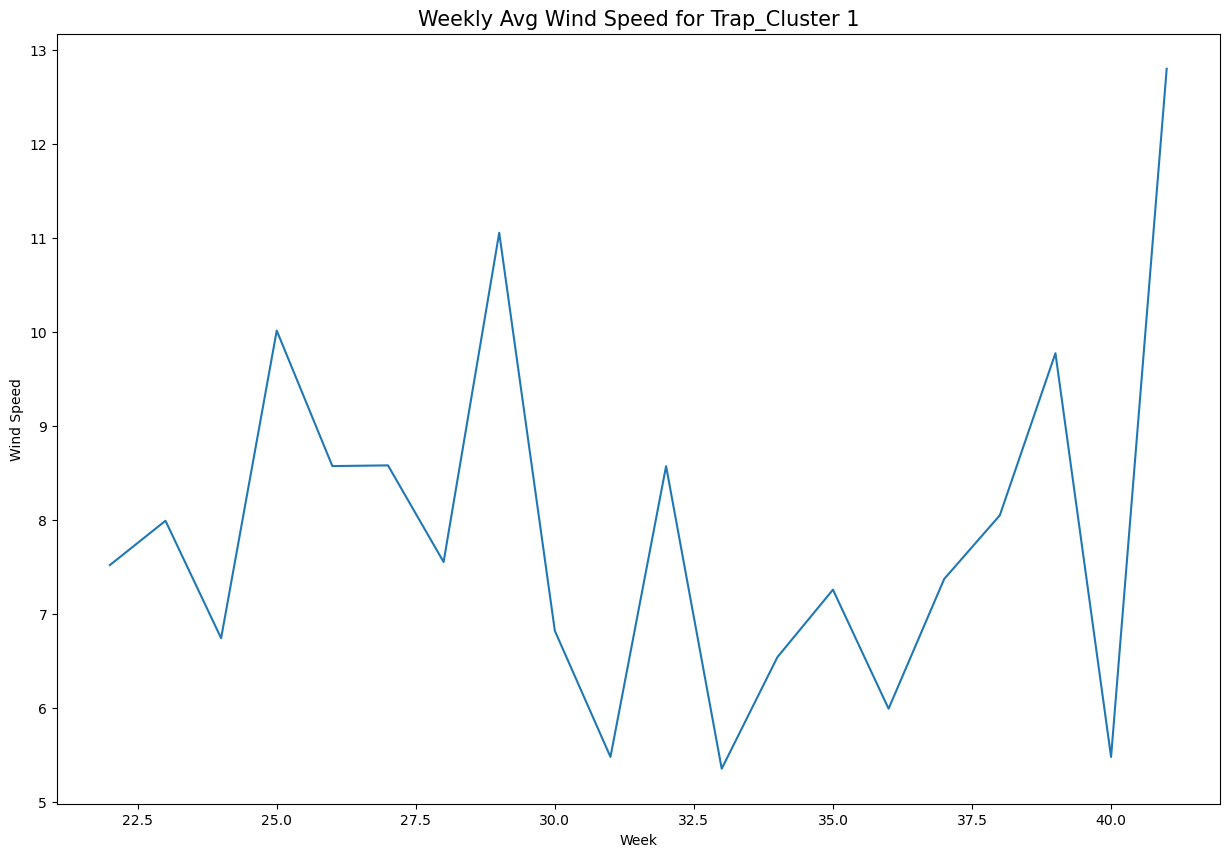

In [30]:
plt.figure(figsize=(15,10))
trap_cluster_1.groupby('week_x')['AvgSpeed'].mean().plot()

plt.title('Weekly Avg Wind Speed for Trap_Cluster 1', fontsize=15)
plt.ylabel('Wind Speed')
plt.xlabel('Week');

In [31]:
# Between Jul-Aug 2007, what is the ratio of lag_3 weather conditions?
# Compare this ratio with other years

In [32]:
print(f"2007: {df[(df.index >='2007-07-01') & (df.index <= '2007-08-31')]['superHot_Dry_lag_3'].sum()}")
print(f"2009: {df[(df.index >='2009-07-01') & (df.index <= '2009-08-31')]['superHot_Dry_lag_3'].sum()}")
print(f"2011: {df[(df.index >='2011-07-01') & (df.index <= '2011-08-31')]['superHot_Dry_lag_3'].sum()}")
print(f"2013: {df[(df.index >='2013-07-01') & (df.index <= '2013-08-31')]['superHot_Dry_lag_3'].sum()}")

2007: 1453
2009: 235
2011: 317
2013: 0


In [33]:
print(f"2007: {df[(df.index >='2007-07-01') & (df.index <= '2007-08-31')]['Hot_Dry_lag_3'].sum()}")
print(f"2009: {df[(df.index >='2009-07-01') & (df.index <= '2009-08-31')]['Hot_Dry_lag_3'].sum()}")
print(f"2011: {df[(df.index >='2011-07-01') & (df.index <= '2011-08-31')]['Hot_Dry_lag_3'].sum()}")
print(f"2013: {df[(df.index >='2013-01-01') & (df.index <= '2013-08-31')]['Hot_Dry_lag_3'].sum()}")

2007: 0
2009: 131
2011: 0
2013: 77


In [34]:
print(f"2007: {df[(df.index >='2007-07-01') & (df.index <= '2007-08-31')]['Hot_Wet_lag_3'].sum()}")
print(f"2009: {df[(df.index >='2009-07-01') & (df.index <= '2009-08-31')]['Hot_Wet_lag_3'].sum()}")
print(f"2011: {df[(df.index >='2011-07-01') & (df.index <= '2011-08-31')]['Hot_Wet_lag_3'].sum()}")
print(f"2013: {df[(df.index >='2013-07-01') & (df.index <= '2013-08-31')]['Hot_Wet_lag_3'].sum()}")

2007: 0
2009: 315
2011: 323
2013: 324


In [35]:
print(f"2007: {df[(df.index >='2007-07-01') & (df.index <= '2007-08-31')]['Cool_Dry_lag_3'].sum()}")
print(f"2009: {df[(df.index >='2009-07-01') & (df.index <= '2009-08-31')]['Cool_Dry_lag_3'].sum()}")
print(f"2011: {df[(df.index >='2011-07-01') & (df.index <= '2011-08-31')]['Cool_Dry_lag_3'].sum()}")
print(f"2013: {df[(df.index >='2013-07-01') & (df.index <= '2013-08-31')]['Cool_Dry_lag_3'].sum()}")

2007: 0
2009: 0
2011: 0
2013: 0


In [36]:
print(f"2007: {df[(df.index >='2007-07-01') & (df.index <= '2007-08-31')]['Cool_Wet_lag_3'].sum()}")
print(f"2009: {df[(df.index >='2009-07-01') & (df.index <= '2009-08-31')]['Cool_Wet_lag_3'].sum()}")
print(f"2011: {df[(df.index >='2011-07-01') & (df.index <= '2011-08-31')]['Cool_Wet_lag_3'].sum()}")
print(f"2013: {df[(df.index >='2013-07-01') & (df.index <= '2013-08-31')]['Cool_Wet_lag_3'].sum()}")

2007: 0
2009: 0
2011: 0
2013: 0


In [37]:
# Dict showing what the weather conditions were like 3 weeks before Jul-Aug

years = ['2007','2009','2011','2013']
weather_groups = ['superHot_Dry_lag_3','superHot_Wet_lag_3','Hot_Dry_lag_3','Hot_Wet_lag_3','Cool_Dry_lag_3','Cool_Wet_lag_3'] 
jul_aug_weather_lag_3 = {}

for year in years:
    start = f'{year}-07-01'
    end = f'{year}-08-31'
    jul_aug_weather_lag_3[year] = {'total':df[(df.index >= start) & (df.index <= end)].shape[0]}

    for grp in weather_groups:
        perc_of_total = df[(df.index >= start) & (df.index <= end)][grp].sum() / jul_aug_weather_lag_3[year]['total']
        jul_aug_weather_lag_3[year][grp] = "{:.0%}".format(perc_of_total)
#         perc_of_total = df[(df.index >= start) & (df.index <= end)][grp].sum()
#         jul_aug_weather_lag_3[year][grp] = perc_of_total

In [38]:
jul_aug_weather_lag_3

{'2007': {'total': 2625,
  'superHot_Dry_lag_3': '55%',
  'superHot_Wet_lag_3': '45%',
  'Hot_Dry_lag_3': '0%',
  'Hot_Wet_lag_3': '0%',
  'Cool_Dry_lag_3': '0%',
  'Cool_Wet_lag_3': '0%'},
 '2009': {'total': 1129,
  'superHot_Dry_lag_3': '21%',
  'superHot_Wet_lag_3': '40%',
  'Hot_Dry_lag_3': '12%',
  'Hot_Wet_lag_3': '28%',
  'Cool_Dry_lag_3': '0%',
  'Cool_Wet_lag_3': '0%'},
 '2011': {'total': 1133,
  'superHot_Dry_lag_3': '28%',
  'superHot_Wet_lag_3': '44%',
  'Hot_Dry_lag_3': '0%',
  'Hot_Wet_lag_3': '29%',
  'Cool_Dry_lag_3': '0%',
  'Cool_Wet_lag_3': '0%'},
 '2013': {'total': 1470,
  'superHot_Dry_lag_3': '0%',
  'superHot_Wet_lag_3': '78%',
  'Hot_Dry_lag_3': '0%',
  'Hot_Wet_lag_3': '22%',
  'Cool_Dry_lag_3': '0%',
  'Cool_Wet_lag_3': '0%'}}

In [39]:
# Dict showing what the weather conditions were like 3 weeks before Jul-Aug

years = ['2007','2009','2011','2013']
weather_groups = ['superHot_Dry_lag_2','superHot_Wet_lag_2','Hot_Dry_lag_2','Hot_Wet_lag_2','Cool_Dry_lag_2','Cool_Wet_lag_2'] 
jul_aug_weather_lag_2 = {}

for year in years:
    start = f'{year}-07-01'
    end = f'{year}-08-31'
    jul_aug_weather_lag_2[year] = {'total':df[(df.index >= start) & (df.index <= end)].shape[0]}
    
    for grp in weather_groups:
        perc_of_total = df[(df.index >= start) & (df.index <= end)][grp].sum() / jul_aug_weather_lag_2[year]['total']
        jul_aug_weather_lag_2[year][grp] = "{:.0%}".format(perc_of_total)

In [40]:
jul_aug_weather_lag_2

{'2007': {'total': 2625,
  'superHot_Dry_lag_2': '29%',
  'superHot_Wet_lag_2': '71%',
  'Hot_Dry_lag_2': '0%',
  'Hot_Wet_lag_2': '0%',
  'Cool_Dry_lag_2': '0%',
  'Cool_Wet_lag_2': '0%'},
 '2009': {'total': 1129,
  'superHot_Dry_lag_2': '18%',
  'superHot_Wet_lag_2': '33%',
  'Hot_Dry_lag_2': '20%',
  'Hot_Wet_lag_2': '29%',
  'Cool_Dry_lag_2': '0%',
  'Cool_Wet_lag_2': '0%'},
 '2011': {'total': 1133,
  'superHot_Dry_lag_2': '0%',
  'superHot_Wet_lag_2': '100%',
  'Hot_Dry_lag_2': '0%',
  'Hot_Wet_lag_2': '0%',
  'Cool_Dry_lag_2': '0%',
  'Cool_Wet_lag_2': '0%'},
 '2013': {'total': 1470,
  'superHot_Dry_lag_2': '0%',
  'superHot_Wet_lag_2': '67%',
  'Hot_Dry_lag_2': '0%',
  'Hot_Wet_lag_2': '33%',
  'Cool_Dry_lag_2': '0%',
  'Cool_Wet_lag_2': '0%'}}

In [41]:
# Dict showing what the weather conditions were like 3 weeks before Jul-Aug

years = ['2007','2009','2011','2013']
weather_groups = ['superHot_Dry_lag_1','superHot_Wet_lag_1','Hot_Dry_lag_1','Hot_Wet_lag_1','Cool_Dry_lag_1','Cool_Wet_lag_1'] 
jul_aug_weather_lag_1 = {}

for year in years:
    start = f'{year}-07-01'
    end = f'{year}-08-31'
    jul_aug_weather_lag_1[year] = {'total':df[(df.index >= start) & (df.index <= end)].shape[0]}

    for grp in weather_groups:
        perc_of_total = df[(df.index >= start) & (df.index <= end)][grp].sum() / jul_aug_weather_lag_1[year]['total']
        jul_aug_weather_lag_1[year][grp] = "{:.0%}".format(perc_of_total)

In [42]:
jul_aug_weather_lag_1

{'2007': {'total': 2625,
  'superHot_Dry_lag_1': '24%',
  'superHot_Wet_lag_1': '76%',
  'Hot_Dry_lag_1': '0%',
  'Hot_Wet_lag_1': '0%',
  'Cool_Dry_lag_1': '0%',
  'Cool_Wet_lag_1': '0%'},
 '2009': {'total': 1129,
  'superHot_Dry_lag_1': '0%',
  'superHot_Wet_lag_1': '41%',
  'Hot_Dry_lag_1': '8%',
  'Hot_Wet_lag_1': '51%',
  'Cool_Dry_lag_1': '0%',
  'Cool_Wet_lag_1': '0%'},
 '2011': {'total': 1133,
  'superHot_Dry_lag_1': '29%',
  'superHot_Wet_lag_1': '71%',
  'Hot_Dry_lag_1': '0%',
  'Hot_Wet_lag_1': '0%',
  'Cool_Dry_lag_1': '0%',
  'Cool_Wet_lag_1': '0%'},
 '2013': {'total': 1470,
  'superHot_Dry_lag_1': '0%',
  'superHot_Wet_lag_1': '64%',
  'Hot_Dry_lag_1': '0%',
  'Hot_Wet_lag_1': '36%',
  'Cool_Dry_lag_1': '0%',
  'Cool_Wet_lag_1': '0%'}}

In [43]:
# IN the two years where there was a massive spike in WnvPresent, 2007 and 2013, the weather conditions that dominated the 
# three weeks before Jul-Aug (peak season of infections) were very different.
# 2007: mostly superHot_Dry / Hot_Dry / Hot_Wet  
# 2013: all Hot_Wet 

In [44]:
# Dict showing what the weather conditions were like 3 weeks before Oct

years = ['2007','2009','2011','2013']
weather_groups = ['superHot_Dry_lag_3','superHot_Wet_lag_3','Hot_Dry_lag_3','Hot_Wet_lag_3','Cool_Dry_lag_3','Cool_Wet_lag_3'] 
oct_weather_lag_3 = {}

for year in years:
    start = f'{year}-10-01'
    end = f'{year}-10-31'
    oct_weather_lag_3[year] = {'total':df[(df.index >= start) & (df.index <= end)].shape[0]}
    
    for grp in weather_groups:
        perc_of_total = df[(df.index >= start) & (df.index <= end)][grp].sum() / oct_weather_lag_3[year]['total']
        oct_weather_lag_3[year][grp] = "{:.0%}".format(perc_of_total)

C:\Users\leagu\AppData\Local\Temp\ipykernel_14744\2560721609.py:13: RuntimeWarning: invalid value encountered in longlong_scalars
  perc_of_total = df[(df.index >= start) & (df.index <= end)][grp].sum() / oct_weather_lag_3[year]['total']


In [45]:
oct_weather_lag_3

{'2007': {'total': 211,
  'superHot_Dry_lag_3': '12%',
  'superHot_Wet_lag_3': '0%',
  'Hot_Dry_lag_3': '0%',
  'Hot_Wet_lag_3': '0%',
  'Cool_Dry_lag_3': '88%',
  'Cool_Wet_lag_3': '0%'},
 '2009': {'total': 65,
  'superHot_Dry_lag_3': '0%',
  'superHot_Wet_lag_3': '0%',
  'Hot_Dry_lag_3': '0%',
  'Hot_Wet_lag_3': '100%',
  'Cool_Dry_lag_3': '0%',
  'Cool_Wet_lag_3': '0%'},
 '2011': {'total': 0,
  'superHot_Dry_lag_3': 'nan%',
  'superHot_Wet_lag_3': 'nan%',
  'Hot_Dry_lag_3': 'nan%',
  'Hot_Wet_lag_3': 'nan%',
  'Cool_Dry_lag_3': 'nan%',
  'Cool_Wet_lag_3': 'nan%'},
 '2013': {'total': 0,
  'superHot_Dry_lag_3': 'nan%',
  'superHot_Wet_lag_3': 'nan%',
  'Hot_Dry_lag_3': 'nan%',
  'Hot_Wet_lag_3': 'nan%',
  'Cool_Dry_lag_3': 'nan%',
  'Cool_Wet_lag_3': 'nan%'}}